# Applied Data Science Capstone Project

##  Finding the best location to start up a modern cuisine restaurant in Athens

<img src="http://www.toloukoumi.com/images/easyblog_images/778/b2ap3_thumbnail_TraditionalGreekCuisine5.jpg" alt="Modern Cuisine Restaurant">

## Introduction

For Applied Data Science Capstone Project a hypothetical scenario of a modern cuisine restaurant in Athens, Capital of Greece is created. In this scenario a professional of food and drink gastronomy wants to start a modern cuisine area in Athens and looks for advice on selecting the best location for opening his restaurant in Athens. Project idea is selecting the best location to avoid unnecessary competition because of similar restaraunts in proximity and exploiting the opportunity assuming that there are not many modern restaurants. To maximize profit attracting many customers he must open his restaurants in area where modern cuisine is popular, meaning that there are similar restaurants in the area, so he must make a very detailed decision and select the most suitable location.

## Problem statement

The objective of this capstone project is to find the most suitable location for a gastronomy professional to start up a modern cuisine restaurant in Athens, capital of Greece. Using data science methodology and machine learning such as clustering, project aims in providing the best proposal to the question: where should a gastronomy professional, in vinicity of Athens, open a modern cuisine restaurant, considering that it should attract many customers who enjoy this type of cuisine and avoiding unnecessary competitive restaurants that it is possible.

## Target audience

Gastronomy professionals who wish to open a modern cuisine restaurant in Athens city.

## Data needed

This problem to be solved needs following data: 
* List of neighborhoods Athens, Greece.
* Latitude and Longitude of these neighborhoods.
* Venue data related to modern cuisine restaurants to find the most suitable neibourhood to open such a restaurant.

## Methodology

At first step the list of Athens municipalities is get. It is extracted by webscraping using beautiful soup module from the wikipedia page https://en.wikipedia.org/wiki/Category:Municipalities_of_Attica

Data are collected in a list and their coordinates (latitude and longitude) are found using foursquare api. Municipalities names and their coordinates are stored inside a dataframe. A function utilizing try, except is used because some of these municipalities may not be detectable by foursquare. Geocoder data does not work well so foursquare solution is preferred. for practicallity reasons search results are stored in a csv file inorder not to webscrape and collect data each time notebook is run.

Using foursquare api and modern greek cuisine, modern european cuisine categories all relevant restaurants near collected municipalities coordinates are found and stored in second dataframe and stored in another csv file for practicallity reasons too. The data are further cleaned removing potential venues lieing outside of Attica (Athens) state and outside of Greece. Duplicate values are found and removed too. Unnecessary columns of the dataframe are removed too.

Using Folium restaurants are visualized on mapand an initial estimation, based on geographical dispersion/ concentration is made about the optimum location that a restaurant should open.

Lastly, k-means clustering is performed. Trials with empirically chosen two and three clusters number (k) are made, while elbow method implementation indicates k=2 as the optimum number of clusters, that aggrees with emperical results.


## Collecting necessary data

Steps that will be followd to collect necessary data are:
    
* Scrapping Athens neighborhoods from a Wikipedia page (https://en.wikipedia.org/wiki/Category:Municipalities_of_Attica) using Beuatiful Soup
* Getting the coordinates (Latitude and Longitude)of these neighborhoods via Geocoder package
* Using Foursquare API to get venue data related to these neighborhoods

In [41]:
#install necessary modules
!pip install requests
from bs4 import BeautifulSoup 
import requests 
#download wikipedia page
r=requests.get('https://en.wikipedia.org/wiki/Category:Municipalities_of_Attica')

In [42]:
#print the first 1000 characters of the downloaded html page
print(r.text[0:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Category:Municipalities of Attica - Wikipedia</title>
<script>document.documentElement.className=document.documentElement.className.replace(/(^|\s)client-nojs(\s|$)/,"$1client-js$2");RLCONF={"wgCanonicalNamespace":"Category","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":14,"wgPageName":"Category:Municipalities_of_Attica","wgTitle":"Municipalities of Attica","wgCurRevisionId":675346364,"wgRevisionId":675346364,"wgArticleId":32097193,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Commons category link is on Wikidata","Municipalities of Greece","Populated places in Attica"],"wgBreakFrames":!1,"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","

In [43]:
neighbourhoods=[]
from bs4 import BeautifulSoup
soup=BeautifulSoup(r.text,'html.parser')
results=soup.find_all('div', attrs={'style':'padding:0em 0.25em'})
results
for x in results:
   z=x.find('ul').text
   neighbourhoods.append(z)
    
  
#data will be cleaned

neighbourhoods2=[]       
str=", Athens\n"
for x in neighbourhoods:
    y=x.split(str)
    neighbourhoods2.extend(y)

    

neighbourhoods3=[]
for x in neighbourhoods2:
    y=x.split("\n")
    neighbourhoods3.extend(y)
   

neighbourhoods3

['Athens',
 'Dafni-Ymittos',
 'Filadelfeia-Chalkidona',
 'Galatsi',
 'Ilioupoli',
 'Kaisariani',
 'Vyronas',
 'Zografou',
 'Agia Paraskevi',
 'Chalandri',
 'Filothei-Psychiko',
 'Irakleio',
 'Kifissia',
 'Lykovrysi-Pefki',
 'Marousi',
 'Metamorfosi',
 'Nea Ionia',
 'Papagou-Cholargos',
 'Penteli',
 'Vrilissia',
 'Agia Varvara',
 'Agioi Anargyroi-Kamatero',
 'Aigaleo',
 'Haidari',
 'Ilion',
 'Peristeri',
 'Petroupoli',
 'Agios Dimitrios ',
 'Alimos',
 'Elliniko-Argyroupoli',
 'Glyfada',
 'Kallithea',
 'Moschato-Tavros',
 'Nea Smyrni',
 'Palaio Faliro',
 'Keratsini-Drapetsona',
 'Korydallos',
 'Nikaia-Agios Ioannis Rentis',
 'Perama',
 'Piraeus',
 'Acharnes',
 'Dionysos',
 'Kropia',
 'Lavreotiki',
 'Marathon',
 'Markopoulo',
 'Oropos',
 'Paiania',
 'Pallini',
 'Rafina-Pikermi',
 'Saronikos',
 'Spata-Artemida',
 'Vari-Voula-Vouliagmeni',
 'Aspropyrgos',
 'Eleusis',
 'Fyli',
 'Mandra-Eidyllia',
 'Megara',
 'Aegina',
 'Agistri',
 'Hydra',
 'Kythira',
 'Poros',
 'Salamis',
 'Spetses',
 'Troi

## Importing Necessary Libraries

In [44]:
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy import geocoders
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Folium installed
Libraries imported.


**Define Foursquare Credentials and Version**

In [45]:
CLIENT_ID = 'LBC00PWBYPHWNITVTEEH5G2WV1P5HYTAY2Y4UITD1RJ5F5ZX' # your Foursquare ID
CLIENT_SECRET = 'QOORYBLAEAXZSHYUSDRBDTI3OW52QKNVUKMQDCOEZ02LIDA5' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 100

print('Your credentails:')
#print('CLIENT_ID: ' + CLIENT_ID)
#print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:


## Find Athens Municipalities

In [46]:
print('search_query for modern restaurants.... OK!')
locations=[]
lats=[]
longs=[]
for x in neighbourhoods3:
    try:
        address = x
        locations.append(address)
        geolocator = Nominatim(user_agent="foursquare_agent")
        location = geolocator.geocode(address)
        lat = location.latitude
        lng = location.longitude
        print(x," coordinates ",lat, lng)
        lats.append(lat)
        longs.append(lng)
        
        
    except:
        print("place not found")


search_query for modern restaurants.... OK!
Athens  coordinates  33.9597677 -83.376398
Dafni-Ymittos  coordinates  37.9548455 23.7461703
Filadelfeia-Chalkidona  coordinates  38.0449261 23.7409430605505
Galatsi  coordinates  38.01777205 23.7542161807409
Ilioupoli  coordinates  37.9325151 23.7555891
Kaisariani  coordinates  37.958162 23.7990047717574
Vyronas  coordinates  37.9564565 23.7554813
Zografou  coordinates  37.9773935 23.770726
Agia Paraskevi  coordinates  39.2475388 26.2711986
Chalandri  coordinates  48.5661897 -1.8586422
Filothei-Psychiko  coordinates  38.0221347 23.7848706
Irakleio  coordinates  35.3400127 25.1343475
Kifissia  coordinates  38.0714005 23.8082604
Lykovrysi-Pefki  coordinates  38.0681489 23.7803023
Marousi  coordinates  38.04557435 23.8052701626056
Metamorfosi  coordinates  40.0389561 22.3780885
Nea Ionia  coordinates  38.0393839 23.7575330364706
Papagou-Cholargos  coordinates  37.99119735 23.805235200638
Penteli  coordinates  38.0505896 23.8614591
Vrilissia  co

## Forming Dataframe

A data frame containing Athens municipalities with their coordinates (gegraphical latitude and longitude) where venues (restaurants serving modern cuising) will be stored.

In [47]:
import pandas as pd # library for data analsysis
df = pd.DataFrame(list(zip(locations, lats,longs)), columns =['Location', 'Latitude','Longitude']) 
df.head(10)

,Location,Latitude,Longitude
0,Athens,33.959768,-83.376398
1,Dafni-Ymittos,37.954845,23.746170
2,Filadelfeia-Chalkidona,38.044926,23.740943
3,Galatsi,38.017772,23.754216
4,Ilioupoli,37.932515,23.755589
5,Kaisariani,37.958162,23.799005
6,Vyronas,37.956457,23.755481
7,Zografou,37.977393,23.770726
8,Agia Paraskevi,39.247539,26.271199
9,Chalandri,48.566190,-1.858642


In [48]:
df.size

195

In [49]:
df.shape

(65, 3)

For practical reasons dataframe df contents will be saved in a csv file in current directory

In [50]:
df.to_csv ('locations.csv', index = None, header=True)

Now dataframe df contents are saved in locations.csv file in current directory

In [51]:
cities=pd.read_csv('locations.csv')
cities.head()

,Location,Latitude,Longitude
0,Athens,33.959768,-83.376398
1,Dafni-Ymittos,37.954846,23.746170
2,Filadelfeia-Chalkidona,38.044926,23.740943
3,Galatsi,38.017772,23.754216
4,Ilioupoli,37.932515,23.755589


## Search for restaurants serving modern cuisine at found locations

Search for restaurants servicing modern cuisine in the cities

In [52]:
#https://developer.foursquare.com/docs/resources/categories
#modern greek restaurant: 53d6c1b0e4b02351e88a83d4
#modern european restaurant: 52e81612bcbc57f1066b79f9
#radius = 10000
venues=[]
for row in cities.itertuples():
    lat=row.Latitude
    lng=row.Longitude
    #defining the corresponding url for the foursquare API
    url = 'https://api.foursquare.com/v2/venues/search?categoryId=52e81612bcbc57f1066b79f9,53d6c1b0e4b02351e88a83d4&client_id={}&client_secret={}&ll={},{}&v={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat, lng, VERSION, LIMIT)
    results = requests.get(url).json()
    # assign relevant part of JSON to venues
    results=results['response']['venues']
    venues.extend(results)
    
    


## Create a dataframe containing modern cuisine restaurants search

In [53]:
# tranform venues into a dataframe
restaurants = json_normalize(venues)
restaurants.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '53d6c1b0e4b02351e88a83d4', 'name': 'M...",False,5723c3b2498e259d17f43406,Ερμού 33,GR,Βύρωνας,Ελλάδα,Φλέμινγκ,1460,"[Ερμού 33 (Φλέμινγκ), 162 33 Βύρωνας, Αττική, ...","[{'label': 'display', 'lat': 37.955225, 'lng':...",37.955225,23.762807,NaN,162 33,Αττική,Giasou,v-1559595093,NaN
1,"[{'id': '52e81612bcbc57f1066b79f9', 'name': 'M...",False,4f9c2f67e4b043736fcfe11a,Λεωφ. Βασιλέως Αλεξάνδρου 2,GR,Αθήνα,Ελλάδα,στο Divani Caravel,2077,[Λεωφ. Βασιλέως Αλεξάνδρου 2 (στο Divani Carav...,"[{'label': 'display', 'lat': 37.97298830471942...",37.972988,23.751718,NaN,161 21,Αττική,JuJu Bar Restaurant,v-1559595093,NaN
2,"[{'id': '53d6c1b0e4b02351e88a83d4', 'name': 'M...",False,5b9ac54bacb00b002c232dc5,Pellis,GR,Αθήνα,Ελλάδα,Korytsas,4379,"[Pellis (Korytsas), 104 47 Αθήνα, Αττική, Ελλάδα]","[{'label': 'display', 'lat': 37.983353, 'lng':...",37.983353,23.711785,NaN,104 47,Αττική,ραφικι,v-1559595093,NaN
3,"[{'id': '4bf58dd8d48988d10e941735', 'name': 'G...",False,58c2ac696ad73d0d9997b6cf,Λυκαβηττού 16,GR,Αθήνα,Ελλάδα,NaN,2847,"[Λυκαβηττού 16, 106 73 Αθήνα, Αττική, Ελλάδα]","[{'label': 'display', 'lat': 37.97956674622969...",37.979567,23.737834,NaN,106 73,Αττική,Κιουζίν,v-1559595093,486226300
4,"[{'id': '53d6c1b0e4b02351e88a83d4', 'name': 'M...",False,5b9edf292be425002ca0f744,NaN,GR,Γλυκών Νερών,Ελλάδα,NaN,9892,"[153 54 Γλυκών Νερών, Ελλάδα]","[{'label': 'display', 'lat': 37.989153, 'lng':...",37.989153,23.850160,NaN,153 54,NaN,Λυκονερι,v-1559595093,NaN


In [54]:
restaurants.size

41686

In [55]:
restaurants.shape

(2194, 19)

For reasons of practicality contents of the dataframe will be saved in a csv file in the current directory too.

In [56]:
restaurants.to_csv ('restaurants.csv', index = None, header=True)

In [57]:
modern=pd.read_csv('restaurants.csv')
modern.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '53d6c1b0e4b02351e88a83d4', 'name': 'M...",False,5723c3b2498e259d17f43406,Ερμού 33,GR,Βύρωνας,Ελλάδα,Φλέμινγκ,1460,"['Ερμού 33 (Φλέμινγκ)', '162 33 Βύρωνας, Αττικ...","[{'label': 'display', 'lat': 37.955225, 'lng':...",37.955225,23.762807,NaN,162 33,Αττική,Giasou,v-1559595093,NaN
1,"[{'id': '52e81612bcbc57f1066b79f9', 'name': 'M...",False,4f9c2f67e4b043736fcfe11a,Λεωφ. Βασιλέως Αλεξάνδρου 2,GR,Αθήνα,Ελλάδα,στο Divani Caravel,2077,['Λεωφ. Βασιλέως Αλεξάνδρου 2 (στο Divani Cara...,"[{'label': 'display', 'lat': 37.97298830471942...",37.972988,23.751718,NaN,161 21,Αττική,JuJu Bar Restaurant,v-1559595093,NaN
2,"[{'id': '53d6c1b0e4b02351e88a83d4', 'name': 'M...",False,5b9ac54bacb00b002c232dc5,Pellis,GR,Αθήνα,Ελλάδα,Korytsas,4379,"['Pellis (Korytsas)', '104 47 Αθήνα, Αττική', ...","[{'label': 'display', 'lat': 37.983353, 'lng':...",37.983353,23.711785,NaN,104 47,Αττική,ραφικι,v-1559595093,NaN
3,"[{'id': '4bf58dd8d48988d10e941735', 'name': 'G...",False,58c2ac696ad73d0d9997b6cf,Λυκαβηττού 16,GR,Αθήνα,Ελλάδα,NaN,2847,"['Λυκαβηττού 16', '106 73 Αθήνα, Αττική', 'Ελλ...","[{'label': 'display', 'lat': 37.97956674622969...",37.979567,23.737834,NaN,106 73,Αττική,Κιουζίν,v-1559595093,486226300.0
4,"[{'id': '53d6c1b0e4b02351e88a83d4', 'name': 'M...",False,5b9edf292be425002ca0f744,NaN,GR,Γλυκών Νερών,Ελλάδα,NaN,9892,"['153 54 Γλυκών Νερών', 'Ελλάδα']","[{'label': 'display', 'lat': 37.989153, 'lng':...",37.989153,23.850160,NaN,153 54,NaN,Λυκονερι,v-1559595093,NaN


**Dropping duplicates**

It is possible that duplicate rows exists inside the dataframe. So, they must be dropped.

In [58]:
modernRestaurants=modern.drop_duplicates()
print("modernRestaurants size is ",modernRestaurants.size)
print("modernRestaurants shape is ",modernRestaurants.shape)

modernRestaurants size is  41686
modernRestaurants shape is  (2194, 19)


**Data needs some cleaning**

In [59]:
df=modernRestaurants.loc[modernRestaurants['location.cc'] == 'GR']

In [60]:
df=modernRestaurants.loc[modernRestaurants['location.state'] == 'Αττική']

In [61]:
print("now size is ",df.size)
print("now shape is ",df.shape)

now size is  35340
now shape is  (1860, 19)


**Leave out unnecessary columns**

In [62]:
df=df.drop(['referralId','location.neighborhood','categories', 'hasPerk', 'location.cc','location.country','location.formattedAddress','location.labeledLatLngs','location.state','location.postalCode','location.crossStreet'], axis=1)
df.head()

,id,location.address,location.city,location.distance,location.lat,location.lng,name,venuePage.id
0,5723c3b2498e259d17f43406,Ερμού 33,Βύρωνας,1460,37.955225,23.762807,Giasou,NaN
1,4f9c2f67e4b043736fcfe11a,Λεωφ. Βασιλέως Αλεξάνδρου 2,Αθήνα,2077,37.972988,23.751718,JuJu Bar Restaurant,NaN
2,5b9ac54bacb00b002c232dc5,Pellis,Αθήνα,4379,37.983353,23.711785,ραφικι,NaN
3,58c2ac696ad73d0d9997b6cf,Λυκαβηττού 16,Αθήνα,2847,37.979567,23.737834,Κιουζίν,486226300.0
5,5c4330ebf427de002c5ec4fe,NaN,Περιστερίου,7996,38.012203,23.691300,Κότταβος,NaN


**Change columns' names**

In [63]:
df.rename(columns={'location.address': 'address', 'location.city': 'city', 'location.distance': 'distance', 'location.lat': 'lat', 'location.lng': 'lng'}, inplace=True)
df.head()

,id,address,city,distance,lat,lng,name,venuePage.id
0,5723c3b2498e259d17f43406,Ερμού 33,Βύρωνας,1460,37.955225,23.762807,Giasou,NaN
1,4f9c2f67e4b043736fcfe11a,Λεωφ. Βασιλέως Αλεξάνδρου 2,Αθήνα,2077,37.972988,23.751718,JuJu Bar Restaurant,NaN
2,5b9ac54bacb00b002c232dc5,Pellis,Αθήνα,4379,37.983353,23.711785,ραφικι,NaN
3,58c2ac696ad73d0d9997b6cf,Λυκαβηττού 16,Αθήνα,2847,37.979567,23.737834,Κιουζίν,486226300.0
5,5c4330ebf427de002c5ec4fe,NaN,Περιστερίου,7996,38.012203,23.691300,Κότταβος,NaN


## Results

### Visualize restaurants

To visualize restaurants  

Lets find Athens' coordinates

In [64]:
address = 'Athens,Greece'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
lat = location.latitude
lng = location.longitude
print(address," coordinates ",lat, lng)

Athens,Greece  coordinates  37.9841493 23.7279843


In [65]:
#Athens coordinates
latitude=37.9841493
longitude=23.7279843

In [66]:
# create map and display it
athens_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# display the map of Athens
#athens_map

In [67]:
# add the restaurants as blue circle markers
for x, y in zip(df['lat'],df['lng']):
    folium.CircleMarker(
        [x, y],
        radius=5,
        color='blue',
        #popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(athens_map)


# display map
athens_map

**The map above presents restaurants in Athens offering modern Greek and European cuisine. Next using k-means clustering the best location to open a restaurant of modern cuisine wll be selected. The problem is solved for two and three clusters. Using the elbow method it is proved that optimal number of clusters is k=2, something that empirically studying the map above seems correct**

centroids coordinates are [[37.98084517 23.95300686]
 [37.97010779 23.72405538]
 [38.04334397 23.80351199]]


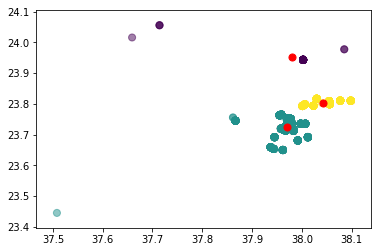

In [68]:
from IPython.core.display import display, HTML

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
df=df[['lat','lng']]
kmeans = KMeans(n_clusters=3).fit(df)
centroids = kmeans.cluster_centers_
print("centroids coordinates are",centroids)

plt.scatter(df['lat'], df['lng'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)





[[37.97010779 23.72405538]
 [38.03563204 23.82195866]]


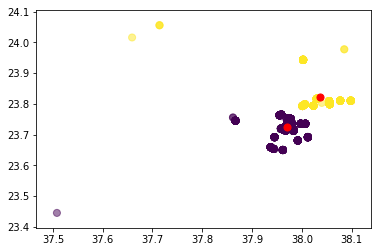

In [69]:
df=df[['lat','lng']]
kmeans = KMeans(n_clusters=2).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['lat'], df['lng'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

It apperars that there are two high concentration clusters.

**Finding the optimal number of clusters using Elbow method**

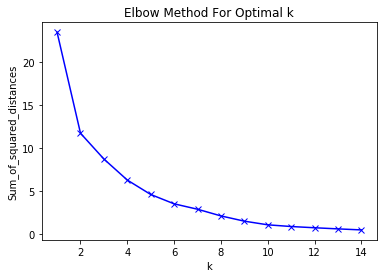

In [70]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(df)
data_transformed = mms.transform(df)
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)
    
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

By using elbow method it appears that the **optimum k** (number of clusters) is **2**

## Discusion - recommendations

K-means clustering indicates that exist two location-clusters (using k=2). The cluster of lower concentration should be chosen as the solution; a location belongint to that cluster (of yellow colour) should be selected. Strategically, restaurants owners should select a location where much customer traffic is expected. So, all restaurant ownwers would make similar selections about the location of their restaurant. The result of this behavior would be that many restaurants would open nearby in the same area to exploit that area strategical characteristics. So, one should select one cluster with high concentration, ideally the smallest of the tow to avoid some of the competition.

## Conclusion

In this project, we have gone through the process of identifying the business problem, specifying the data required, extracting and preparing the data, performing the machine learning by utilizing k-means clustering and providing recommendation to the stakeholder. 

## References

List of municipalities of Athens:   
[1]:https://en.wikipedia.org/wiki/Category:Municipalities_of_Attica  
Foursquare documentation:  
[2]:https://en.wikipedia.org/wiki/Category:Municipalities_of_Attica  
Foursquare resources' categories:  
[3]:https://developer.foursquare.com/docs/resources/categories